It was an unprecedented year for Formula 1 and as we move into 2021, it's worth looking at some of the the top drivers that dominated the past decade. The drivers have been assessed on 2 parameters - **total races** and **average points per race**. Time period for the analysis is **2010-2020** and drivers with **less than 100 races have been excluded**.
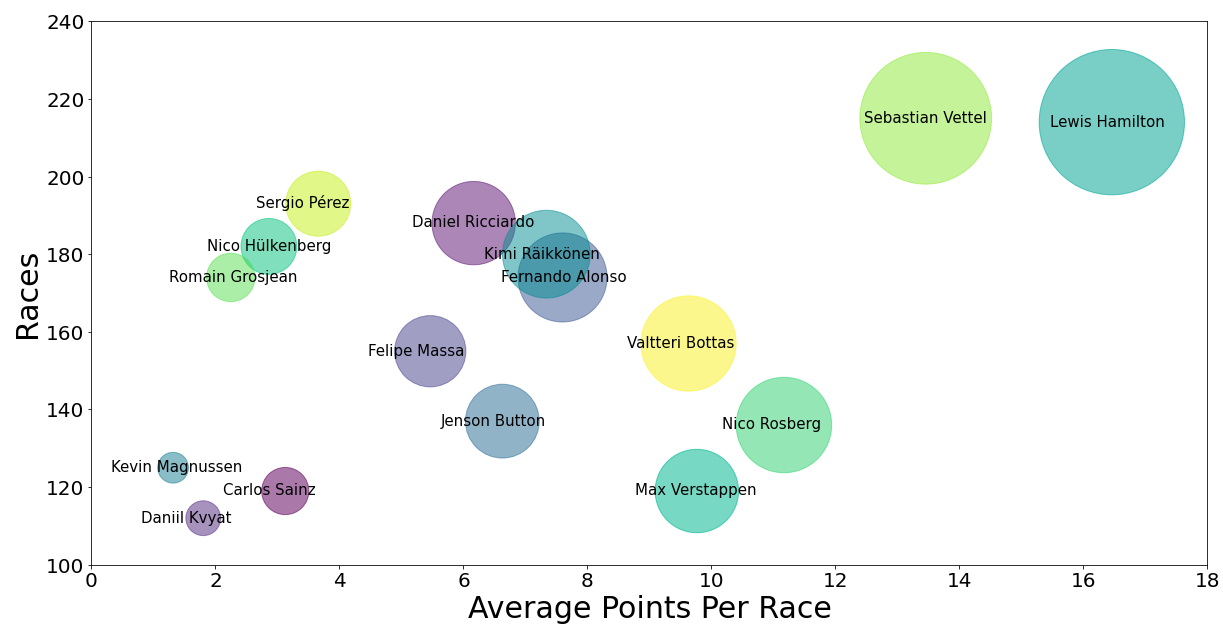

Though Hamilton and Vettel have clearly dominated most of the decade, Max has emerged as one of the top contenders with very few races but high average points per race.

*Note: Size of the bubbles are indicative of the total number of points bagged during the decade*

In [ ]:
# Load in our libraries
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

Three tables have been used that contain details of races, drivers and race results respectively. 

In [ ]:
# Load in the datasets
driv  =pd.read_csv("../input/formula-1-world-championship-1950-2020/drivers.csv")
result=pd.read_csv("../input/formula-1-world-championship-1950-2020/results.csv")
race  =pd.read_csv("../input/formula-1-world-championship-1950-2020/races.csv")

In [ ]:
# Merge all three datasets and filter out races before 2010 
m1=pd.merge(result,driv,on='driverId')
m2=pd.merge(m1,race,on='raceId')
result_v2=m2[m2.year>2009]

Driver data has forename and surname fields. For visualisation, these are combined to show the full name.

In [ ]:
# Create driver name field from forename and surname
result_v2["driver"] = result_v2["forename"] + " " + result_v2["surname"]

In [ ]:
# Aggregate total points and average points per race
avg_pts   = result_v2[['driver','points']].groupby("driver").mean()
total_pts = result_v2[['driver','points']].groupby("driver").sum()

In [ ]:
# Count number of races for each driver and filter out drivers with less than 100 races
n=result_v2[['driver','raceId']].groupby("driver").count()
num_races=n[n.raceId>100]

In [ ]:
# Merge the above summary tables and reset index to create column for driver name
d =pd.merge(avg_pts,total_pts,on='driver')
md=pd.merge(d,num_races,on='driver')
md = md.reset_index()
md.iloc[7,3]=180 #data correction
md.iloc[6,3]=125 #data correction

In [ ]:
# Create bubble chart with size of the bubble showing total points scored in the decade

plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize
plt.rc('figure', titlesize=30)   # fontsize of the figure title

plt.figure(figsize=(20,10))
plt.scatter(md.points_x,md.raceId,s=md.points_y*6,alpha=0.5,c=md.index.to_series())
plt.xlim(0,18)
plt.ylim(100,240)

plt.xlabel("Average Points Per Race")
plt.ylabel("Races")

for x,y,z in zip(md.points_x,md.raceId,md.driver):
   plt.annotate(z,xy=(x-1,y-1)) 

